In [1]:
import qiskit as qsk
import numpy as np

# Single systems

## Quantum states

Define and manipulate quantum states vectors

In [2]:
from qiskit.quantum_info import Statevector 

u = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
zero = Statevector([1, 0])
one = Statevector([0, 1])
w = Statevector([1/5, 4/5])

Ways to visualize the vectors

In [3]:
display(u.draw('latex'))
print('list:', u.draw('text'))

<IPython.core.display.Latex object>

list: [0.70710678+0.j,0.70710678+0.j]


In [4]:
display(zero.draw('latex')); display(one.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
display(w.draw('latex'))
print('list:', w.draw('text'))

<IPython.core.display.Latex object>

list: [0.2+0.j,0.8+0.j]


A valid quantum state must be a unitary vector (norm = 1)

In [6]:
# Check if the states above are valid to represent quantum states

vectors = [zero,one,u,w]

for vec in vectors:
    display(vec.is_valid())

True

True

True

False

Vector w is not a valid quantum state. The sum of its coefficients is 1, but it's norm is not.

In [7]:
print('Norm of w, |w| =', np.sqrt(np.real(np.matmul(w,w))))

Norm of w, |w| = 0.8246211251235323


In [8]:
np.sqrt((1/25 + 16/25))

np.float64(0.8246211251235321)

## Measurements

Prepare a single-qubit quantum state

In [9]:
v = Statevector([(1+3j)/5, np.sqrt(15)/5])

display(v.is_valid())

display(v.draw('latex'))

True

<IPython.core.display.Latex object>

This quantum states represent a superposition of 0 and 1 states.

In [10]:
print('We will measure 0 with Prob = ', 10/25)
print('We will measure 1 with Prob = ', 15/25)

We will measure 0 with Prob =  0.4
We will measure 1 with Prob =  0.6


We perform a measurement and store the resulting state in a new state vector

In [11]:
v_mes = v.measure()

display(v_mes[1].draw('latex'))

<IPython.core.display.Latex object>

Quantum measurements are probabilistic. Another measurement might give a different result.

In [12]:
v_mes = v.measure()

display(v_mes[1].draw('latex'))

<IPython.core.display.Latex object>

If the quantum state is not valid, measure() gives an error

In [13]:
w.measure()

ValueError: Probabilities do not sum to 1. See Notes section of docstring for more information.

A way to visualize the probabilistic nature of quantum measurements can be done through the following method which allows for building an histogram with a given number of samples

{np.str_('0'): np.int64(3989), np.str_('1'): np.int64(6011)}


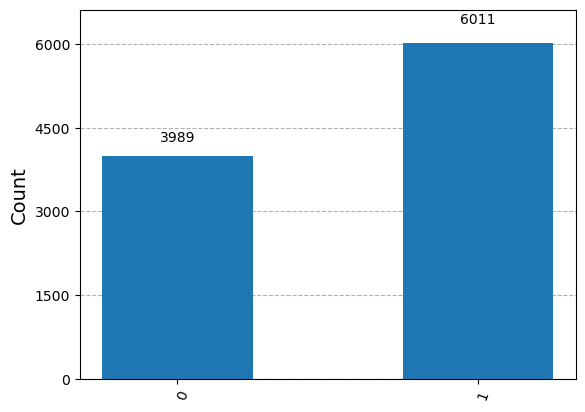

In [14]:
from qiskit.visualization import plot_histogram

samples = v.sample_counts(10000)
print(samples)
plot_histogram(samples)


## Unitary operations

We can define the unitary operators, a.k.a. quantum gates, manually

In [15]:
from qiskit.quantum_info import Operator

# Pauli matrices
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])

# Hadamard gate
H = Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])

# S-gate
S = Operator([[1, 0], [0, 1.0j]])

# T-gate
T = Operator([[1, 0], [0, (1 + 1.0j) / np.sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("latex")

<IPython.core.display.Latex object>

It is better to see it step by step

In [16]:
v = Statevector([1, 0])

v = v.evolve(X)

v.draw('latex')

<IPython.core.display.Latex object>

With the .evolve() method, the state of the vector changes for subsequent operations. Applying the same operation twice gives back the original state. This is a manifestation of operator's unitarity.

In [17]:
v = v.evolve(X)

v.draw('latex')

<IPython.core.display.Latex object>

In [18]:
v = Statevector([1, 0])

v = v.evolve(Y)

v.draw('latex')

<IPython.core.display.Latex object>

In [19]:
v = Statevector([0, 1])

v = v.evolve(Y)

v.draw('latex')

<IPython.core.display.Latex object>

In [20]:
v = Statevector([1, 0])

v = v.evolve(Z)

v.draw('latex')

<IPython.core.display.Latex object>

In [21]:
v = Statevector([0, 1])

v = v.evolve(Z)

v.draw('latex')

<IPython.core.display.Latex object>

In [22]:
v = Statevector([1, 0])

v = v.evolve(H)

v.draw('latex')

<IPython.core.display.Latex object>

In [23]:
v = Statevector([0, 1])

v = v.evolve(H)

v.draw('latex')

<IPython.core.display.Latex object>

In [24]:
v = Statevector([1, 0])

v = v.evolve(S)

v.draw('latex')

<IPython.core.display.Latex object>

In [25]:
v = Statevector([0, 1])

v = v.evolve(S)

v.draw('latex')

<IPython.core.display.Latex object>

In [26]:
v = Statevector([1, 0])

v = v.evolve(T)

v.draw('latex')

<IPython.core.display.Latex object>

In [27]:
v = Statevector([0, 1])

v = v.evolve(T)

v.draw('latex')

<IPython.core.display.Latex object>

### A first quantum circuit

The above set of operations can be implemented as a quantum circuit

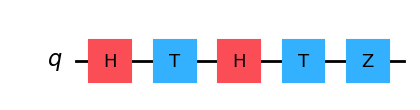

In [28]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(1)

circ.h(0)
circ.t(0)
circ.h(0)
circ.t(0)
circ.z(0)


circ.draw('mpl')

Operations are applied from left to right. Changing the order changes the result (unitary operators do not commute).

We can now prepare a qubit in a given quantum state and evolve it through the circuit.

In [29]:
v0 = Statevector([1,0])

v = v0.evolve(circ)

v.draw('latex')

<IPython.core.display.Latex object>

We can similarly extract the statistical information by sampling multiple times

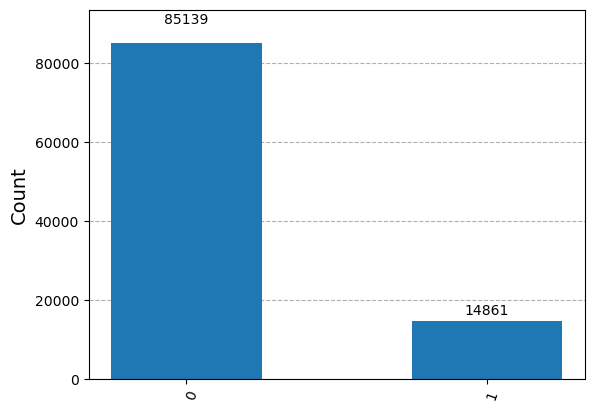

In [30]:
stats = v.sample_counts(100000)

plot_histogram(stats)

# Multiple systems

## Quantum states

There is the tensor product operation to create quantum states of joint systems.

Also, some well-known states can be defined through their standard labels instead of manually. 

In [31]:
zero = Statevector.from_label('0')
one = Statevector.from_label('1')

zero.draw('latex') 

<IPython.core.display.Latex object>

In [32]:
one.draw('latex')

<IPython.core.display.Latex object>

In [33]:
# Combine them with the tensor 

zo = zero.tensor(one)

zo.draw('latex')

<IPython.core.display.Latex object>

The + and - states can also be easily represented

In [34]:
plus = Statevector.from_label('+')
minus = Statevector.from_label('-')

plus.draw('latex')

<IPython.core.display.Latex object>

In [35]:
minus.draw('latex')

<IPython.core.display.Latex object>

In [36]:
# Combine one of above with a given state vector

state = Statevector([1/np.sqrt(2), 1j/np.sqrt(2)])

state.draw('latex')

<IPython.core.display.Latex object>

In [37]:
psi = plus.tensor(state)

psi.draw('latex')

<IPython.core.display.Latex object>

## Quantum operations

There is also a tensor product for the operators. Useful to build composed quantum operations.

In [38]:
X = Operator.from_label('X')

X.draw('latex')

<IPython.core.display.Latex object>

In [39]:
I = Operator.from_label('I')

I.draw('latex')

<IPython.core.display.Latex object>

In [40]:
# Compose X x I

X.tensor(I).draw('latex')

<IPython.core.display.Latex object>

In [41]:
# Also with the ^ operator

(X ^ I).draw('latex')

<IPython.core.display.Latex object>

The state psi above describes two qubits. We can evolve this state with composed operations acting on each qubit separately.

In [42]:
psi.draw('latex')

<IPython.core.display.Latex object>

In [43]:
psi.evolve(I ^ X).draw('latex')

<IPython.core.display.Latex object>

Create a CX operator 

Evolve Psi with this operator

In [44]:
CX = Operator(
    [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
    ]
)

psi.evolve(CX).draw("latex")

<IPython.core.display.Latex object>

## Partial quantum measurements

The .measure() method used previously measures by default all the qubits in the state vector.

If we rather need to perform a partial measurement, we can provide a list of integers to .measure() and choose which qubits we measure.

In [45]:
W = Statevector([0,1,1,0,1,0,0,0]/np.sqrt(3))

W.is_valid()

True

In [46]:
W.draw('latex')

<IPython.core.display.Latex object>

Let's simulate a measurement of the LAST qubit (index 0)

In [47]:
result, new_W = W.measure([0]) # Measure first qubit 

print(f'Measured: {result}\nState after measurement:')
new_W.draw('latex')

Measured: 0
State after measurement:


<IPython.core.display.Latex object>

In [48]:
result, new_W = W.measure([0]) # Measure first qubit 

print(f'Measured: {result}\nState after measurement:')
new_W.draw('latex')

Measured: 1
State after measurement:


<IPython.core.display.Latex object>

Remember: this has a probabilistic nature. Repeating the measurement gives different results. 

In [49]:
for i in range(5):
    result, new_W = W.measure([0]) # Measure first qubit 
    print(f'Measured: {result}')

Measured: 1
Measured: 0
Measured: 0
Measured: 1
Measured: 1


# Quantum circuits

In [50]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

We already introduced a basic quantum circuit. Let's recall.

The default name for the qubits wires in Qiskit is q0, q1, ..., qN. We can however define the circuit with different names for the qubits.

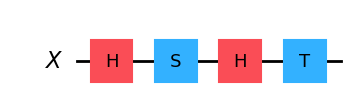

In [55]:
X = QuantumRegister(1, "X") # Define the quantum channel

circuit = QuantumCircuit(X) # Initialize the circuit

# Apply some gates

circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw('mpl')) # Draw

### Qiskit's qubit ordering convention for circuits

In Qiskit, the topmost qubit in a circuit diagram has index 0 and corresponds to the rightmost position in a tuple of qubits (or in a string, Cartesian product, or tensor product corresponding to this tuple). 

The second-from-top qubit has index 1, and corresponds to the position second-from-right in a tuple, and so on, down to the bottommost qubit, which has the highest index, and corresponds to the leftmost position in a tuple. 

In particular, Qiskit's default names for the qubits in an n-qubit circuit are represented by the n-tuple (qn−1,…,q0),(qn−1​,…,q0​), with q0​ being the qubit on the top and qn−1​ on the bottom in quantum circuit diagrams. 

Let's implement a circuit that generates maximally entangled states. 

This circuit will be formed by a HADAMARD and a C-NOT gate.

It is typicall to include additional measurement and registration channels. These can be done by registering the quantum measurements in classical bits. The measurements are typically performed in the standard basis.

In [56]:
# Define the quantum channels

X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")

# Define the Classical Channels

A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

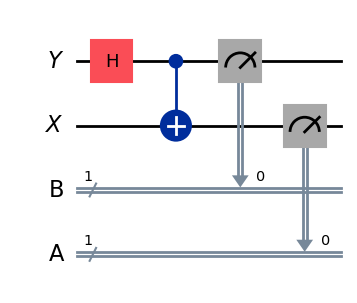

In [59]:
# Define the circuit:

circuit = QuantumCircuit(Y, X, B, A)

# Apply a Hadamard gate and a C-NOT gate. Use the upper qubit as the control qubit.

circuit.h(Y)
circuit.cx(Y, X)

# Add two classical channels to register the measurements

circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw('mpl'))

As done before, the circuit can be simulated using the primitive. Let us try to simulate this quantum circuit and extract the associated statistics.

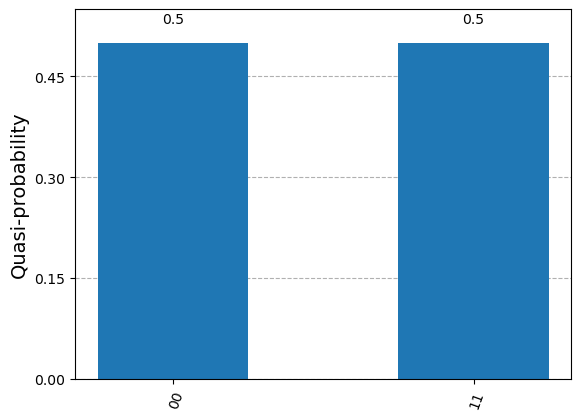

In [61]:
results = Sampler().run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

The circuit measures the quantum system to be in the 00 state with 50% probability, and in the 11 state with 50% probability. This is the expectation of a maximally entangled quantum state. 

Note that the system is initially in the 00 state (both qubits are prepared in the 0 state of the standard basis). One can check that starting from such a state the combined action of the H and C-NOT gates transform the system into the state

$$ \ket{\psi} = \frac{1}{\sqrt{2}}(\ket{00} + \ket{11}) $$